# Importing The necessary Libraries

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import cmath
import seaborn as sns
import os
import itertools
import glob
import shutil

### Importing the dataset and checking the content

In [2]:
df = pd.read_excel("./Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


### We check some infos for if there's any missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

#### figuring the correlation between features to determine what's usable and what's not

<AxesSubplot:>

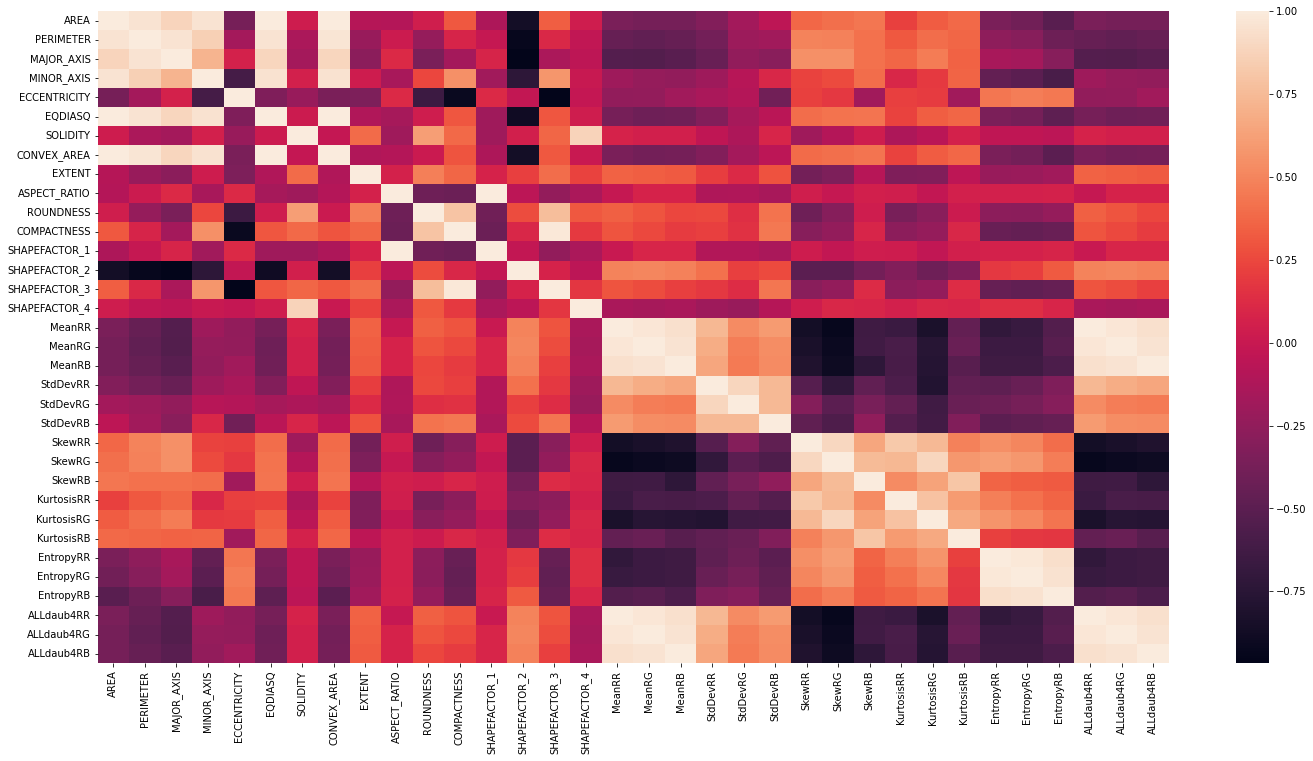

In [4]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=False)

Scatter plotting the Area and perimeter 

<AxesSubplot:xlabel='AREA', ylabel='PERIMETER'>

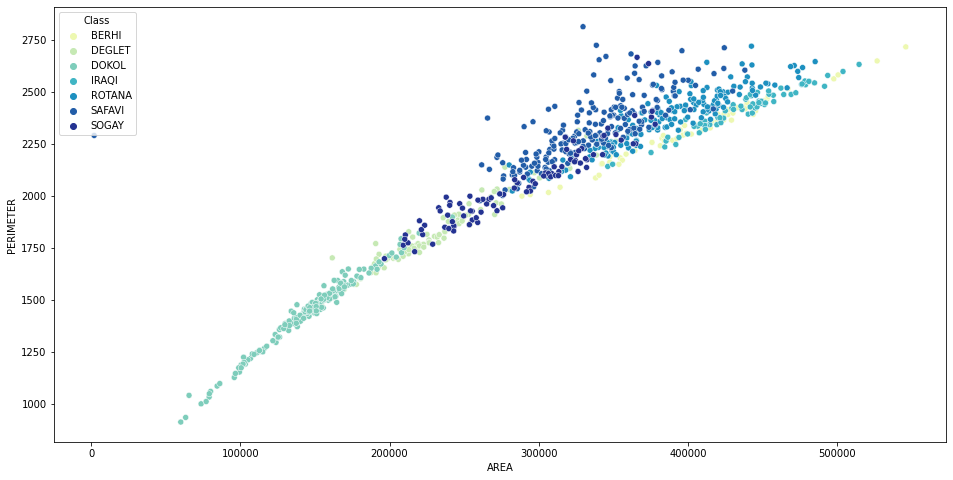

In [5]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['AREA'],y=df['PERIMETER'],hue=df['Class'],palette='YlGnBu',legend='auto')

<AxesSubplot:xlabel='Class', ylabel='count'>

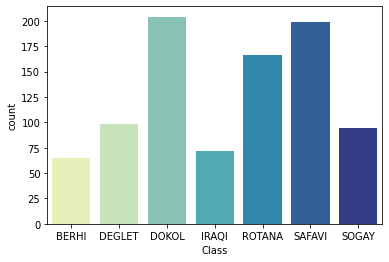

In [6]:
sns.countplot(data=df, x='Class', palette='YlGnBu')

Plotting the median

<AxesSubplot:xlabel='Class', ylabel='AREA'>

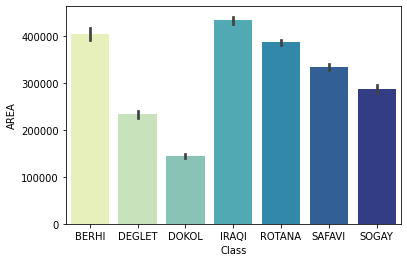

In [7]:
sns.barplot(x=df['Class'],y=df['AREA'],palette='YlGnBu')

Removing the outliers of Solidity and Major_Axis

In [8]:
df = df[df['SOLIDITY'] > 0.93]
df = df[df['MAJOR_AXIS'] < 1000]

Labeling DATA

In [9]:
Features = df.drop('Class',axis=1)
Label = df['Class']

Dropping some features

In [10]:
todrop = ['EXTENT','COMPACTNESS','StdDevRR','EntropyRG','KurtosisRB','ECCENTRICITY','SkewRR','MeanRB',
           'ASPECT_RATIO','SOLIDITY','SHAPEFACTOR_3','SHAPEFACTOR_4','KurtosisRR']
Features.drop(todrop,axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

Splitting the data

In [13]:
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Plotting with random forest to get  useful informations about the important features " To not remove "

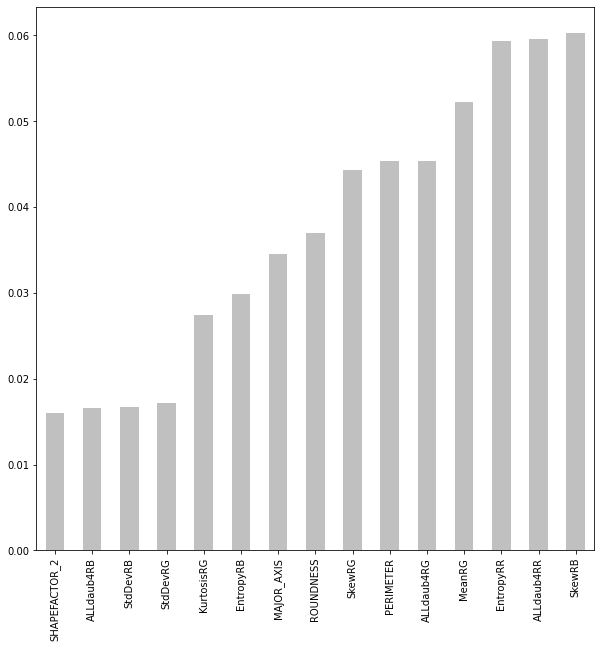

In [15]:
plt.figure(figsize=(10,10))
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=8, n_jobs=-1)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nsmallest(15).plot(kind='bar',color='silver')
plt.show()

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Deploying KNN Module

KNN Classifier

              precision    recall  f1-score   support

       BERHI       0.84      0.94      0.89        17
      DEGLET       0.72      0.78      0.75        27
       DOKOL       0.97      1.00      0.98        59
       IRAQI       0.95      0.87      0.91        23
      ROTANA       0.91      0.98      0.95        54
      SAFAVI       1.00      1.00      1.00        56
       SOGAY       0.88      0.60      0.71        25

    accuracy                           0.92       261
   macro avg       0.90      0.88      0.88       261
weighted avg       0.92      0.92      0.92       261

Accuracy :  0.9195402298850575
F1-score :  0.8845753452896309


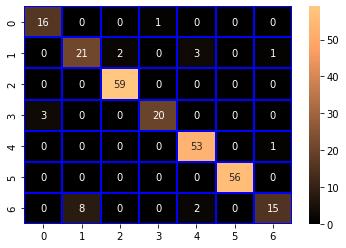

In [17]:
knn = KNeighborsClassifier(n_neighbors=4,p=2,n_jobs=-1)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
print('KNN Classifier' + '\n')
print(classification_report(y_test,knnpred))
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='copper',annot=True,linewidths=2,linecolor='blue')
print("Accuracy : ",metrics.accuracy_score(y_test, knnpred))
print("F1-score : ",metrics.f1_score(y_test, knnpred, average='macro'))

Deploying SVC

Support Vector Classifier

              precision    recall  f1-score   support

       BERHI       1.00      0.94      0.97        17
      DEGLET       0.79      0.85      0.82        27
       DOKOL       0.98      1.00      0.99        59
       IRAQI       0.96      0.96      0.96        23
      ROTANA       0.98      1.00      0.99        54
      SAFAVI       1.00      0.98      0.99        56
       SOGAY       0.83      0.76      0.79        25

    accuracy                           0.95       261
   macro avg       0.93      0.93      0.93       261
weighted avg       0.95      0.95      0.95       261

Accuracy :  0.9501915708812261
F1-score :  0.9303896092346415


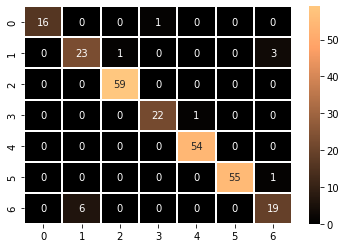

In [18]:
sup = SVC(C=10,gamma='auto',kernel='rbf')
sup.fit(X_train,y_train)
svcpred = sup.predict(X_test)
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))
sns.heatmap(confusion_matrix(y_test,svcpred),cmap='copper',annot=True,linewidths=2,linecolor='white')
print("Accuracy : ",metrics.accuracy_score(y_test, svcpred))
print("F1-score : ",metrics.f1_score(y_test, svcpred, average='macro'))

Using Logistic Regression

In [19]:
logr = LogisticRegression(C=1,max_iter=150,multi_class='auto')
logr.fit(X_train,y_train)
logpred = logr.predict(X_test)
print('Logistic Regression' + '\n')
print(classification_report(y_test,logpred))
print("Accuracy : ",metrics.accuracy_score(y_test, logpred))
print("F1-score : ",metrics.f1_score(y_test, logpred, average='macro'))


Logistic Regression

              precision    recall  f1-score   support

       BERHI       1.00      0.94      0.97        17
      DEGLET       0.88      0.78      0.82        27
       DOKOL       0.97      1.00      0.98        59
       IRAQI       0.96      0.96      0.96        23
      ROTANA       0.98      1.00      0.99        54
      SAFAVI       0.98      1.00      0.99        56
       SOGAY       0.84      0.84      0.84        25

    accuracy                           0.95       261
   macro avg       0.94      0.93      0.94       261
weighted avg       0.95      0.95      0.95       261

Accuracy :  0.9540229885057471
F1-score :  0.9364367977823879


In [20]:
err = []
for i in range(1,20):
    clf = GradientBoostingClassifier(n_estimators=i*10, learning_rate=1.0,max_depth=1)
    clf.fit(X_train,y_train)
    errpred = clf.predict(X_test)
    err.append(np.mean(errpred != y_test))

Using Gradient Boosting

In [23]:
GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=10**-5,max_depth=20)
GBC.fit(X_train,y_train)
GBCpred = clf.predict(X_test)
print('Gradient Boosting' + '\n')
print(classification_report(y_test,GBCpred))
print("Accuracy : ",metrics.accuracy_score(y_test, GBCpred))
print("F1-score : ",metrics.f1_score(y_test, GBCpred, average='macro'))


Gradient Boosting

              precision    recall  f1-score   support

       BERHI       0.93      0.82      0.87        17
      DEGLET       0.62      0.74      0.68        27
       DOKOL       0.95      0.95      0.95        59
       IRAQI       0.86      0.83      0.84        23
      ROTANA       0.95      0.98      0.96        54
      SAFAVI       1.00      0.98      0.99        56
       SOGAY       0.68      0.60      0.64        25

    accuracy                           0.89       261
   macro avg       0.86      0.84      0.85       261
weighted avg       0.89      0.89      0.89       261

Accuracy :  0.8888888888888888
F1-score :  0.8484983307828601


With  neural Networks containing 5 hidden layers

In [22]:
mlp = MLPClassifier(solver='adam', alpha=1e-6, activation='tanh', max_iter = 1000 , hidden_layer_sizes=(10,30,25,23,12), random_state=42).fit(X_train,y_train)
ymlp = mlp.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test, ymlp))
print("F1-score : ",metrics.f1_score(y_test, ymlp, average='macro'))

Accuracy :  0.9616858237547893
F1-score :  0.9456589488102092
